Socila circles: Twitter
This dataset consists of 'circles' (or 'lists') from Twitter. 
Twitter data was crawled from public sources. 
The dataset includes node features (profiles), circles, and ego networks.

First we look at the info of the full datatset and then we view a sample from this dataset so that we can create a subset of it:

In [346]:
import networkx as nx
import random
from networkx.algorithms.distance_measures import diameter

#file_path = "twitter_combined.txt"  
#G = nx.read_edgelist(file_path)


file_path = "twitter/12831.edges"  # Replace with your dataset path
s_G = nx.read_edgelist(file_path) #edges are directed, but we are not treating them like so

ego_node = '12831'
nodes_in_graph = list(s_G.nodes())
print(nodes_in_graph[0])
print(nodes_in_graph[1])
# Add edges from the ego node to every other node
for node in nodes_in_graph:
    if node != ego_node:
        s_G.add_edge(ego_node, node)


# Create a subset of the graph (Example: nodes with degree > 50)
degree_threshold = 50
#subset_nodes = [node for node, degree in dict(G.degree()).items() if degree > degree_threshold]
#s_G = G.subgraph(subset_nodes)

# Find a central node in the subset (e.g., based on degree centrality)
degree_centrality = nx.degree_centrality(s_G)
central_node = max(degree_centrality, key=degree_centrality.get)
print("Central node:", central_node)

# Extract the ego network for the central node
subset_G = nx.ego_graph(s_G, central_node, radius=1)

# Helper: Compute metrics safely with progress logs
def compute_metric(name, func, *args, **kwargs):
    try:
        print(f"Computing {name}...")
        return func(*args, **kwargs)
    except Exception as e:
        print(f"Error computing {name}: {e}")
        return "N/A"

def approximate_diameter(graph, sample_size=100):
    nodes = list(graph.nodes())
    sampled_nodes = random.sample(nodes, min(sample_size, len(nodes)))
    max_eccentricity = 0
    
    for node in sampled_nodes:
        eccentricity = max(nx.single_source_shortest_path_length(graph, node).values())
        max_eccentricity = max(max_eccentricity, eccentricity)
    
    return max_eccentricity

approx_diameter = approximate_diameter(subset_G)    


# Compute metrics for the subset
subset_metrics = {
    "Nodes": subset_G.number_of_nodes(),
    "Edges": subset_G.number_of_edges(),
    "Nodes in largest WCC": compute_metric("Nodes in largest WCC", lambda g: len(max(nx.connected_components(g), key=len)), subset_G),
    "Edges in largest WCC": compute_metric("Edges in largest WCC", lambda g: subset_G.subgraph(max(nx.connected_components(g), key=len)).number_of_edges(), subset_G),
    "Average clustering coefficient": compute_metric("Average clustering coefficient", nx.average_clustering, subset_G),
    "Number of triangles": compute_metric("Number of triangles", lambda g: sum(nx.triangles(g).values()) // 3, subset_G),
    "Fraction of closed triangles": compute_metric("Fraction of closed triangles", nx.transitivity, subset_G),
    "Approximate diameter": compute_metric("Approximate diameter", approximate_diameter, subset_G),
    }

# Output the subset metrics
print("\nSubset Metrics:")
for key, value in subset_metrics.items():
    print(f"{key}: {value}")


398874773
652193
Central node: 12831
Computing Nodes in largest WCC...
Computing Edges in largest WCC...
Computing Average clustering coefficient...
Computing Number of triangles...
Computing Fraction of closed triangles...
Computing Approximate diameter...

Subset Metrics:
Nodes: 237
Edges: 2047
Nodes in largest WCC: 237
Edges in largest WCC: 2047
Average clustering coefficient: 0.5244267275115467
Number of triangles: 6291
Fraction of closed triangles: 0.24920115139831517
Approximate diameter: 2


In [348]:
import networkx as nx
from sklearn.metrics import balanced_accuracy_score, f1_score

# Step 2: Generate dummy ground truth and predictions (example)
def generate_labels_and_predictions(graph):
    # Simulating ground truth and predictions for nodes
    ground_truth = {node: 1 if graph.degree[node] > 60 else 0 for node in graph.nodes()}
    predictions = {node: 1 if graph.degree[node] > 55 else 0 for node in graph.nodes()}
    return ground_truth, predictions

# Step 3: Calculate BER and F1 Score
def calculate_metrics(ground_truth, predictions):
    y_true = list(ground_truth.values())  # Ground truth labels
    y_pred = list(predictions.values())  # Model predictions
    
    # Compute metrics
    ber = 1 - balanced_accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Balanced Error Rate (BER): {ber}")
    print(f"F1 Score: {f1}")
    return ber, f1

# Main function to execute the analysis
def main():
    
    # Generate ground truth and predictions
    ground_truth, predictions = generate_labels_and_predictions(subset_G)

    # Calculate metrics
    calculate_metrics(ground_truth, predictions)

if __name__ == "__main__":
    main()

Balanced Error Rate (BER): 0.0021186440677966045
F1 Score: 0.6666666666666666


Total number of communities: 6
Sizes of communities: [49, 58, 55, 20, 35, 20]


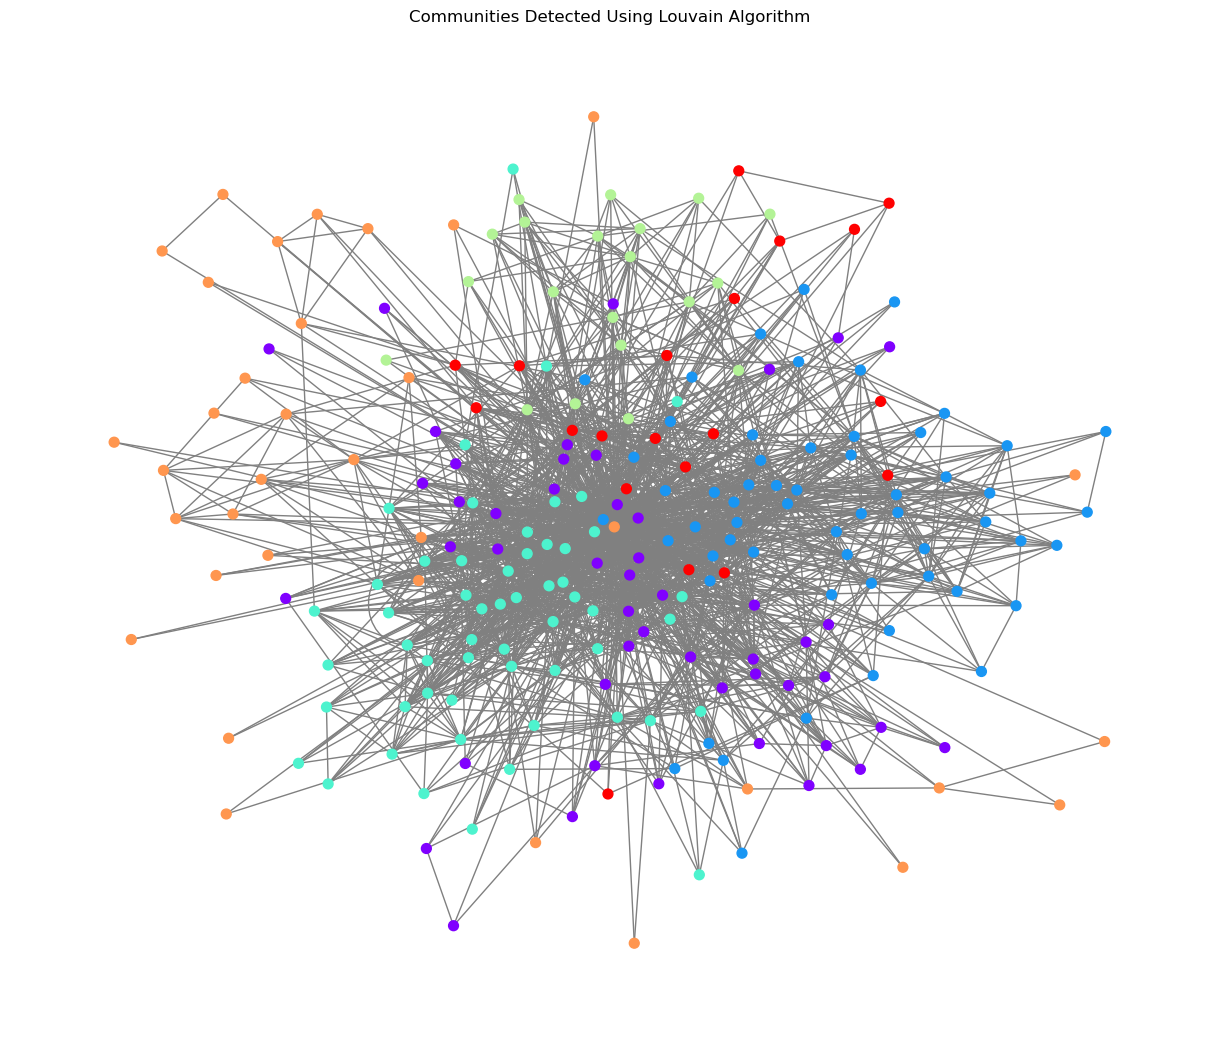

Number of internal edges in each community: [213, 324, 384, 78, 70, 55]
Top central nodes in Community 0: [('1186', 0.2542372881355932), ('180505807', 0.2245762711864407), ('380', 0.2033898305084746), ('883301', 0.17796610169491525), ('586', 0.17372881355932204)]
Top central nodes in Community 1: [('652193', 0.2033898305084746), ('5854882', 0.19915254237288135), ('1260231', 0.19915254237288135), ('8479062', 0.1906779661016949), ('14367669', 0.15254237288135594)]
Top central nodes in Community 2: [('11178592', 0.211864406779661), ('22253', 0.2076271186440678), ('14231571', 0.19915254237288135), ('528', 0.1906779661016949), ('6735', 0.17796610169491525)]
Top central nodes in Community 3: [('9283582', 0.1271186440677966), ('15384741', 0.11864406779661017), ('14819149', 0.08898305084745763), ('8708232', 0.08050847457627118), ('17729005', 0.07627118644067797)]
Top central nodes in Community 4: [('12831', 1.0), ('16803822', 0.0847457627118644), ('14086492', 0.06779661016949153), ('20554406',

In [350]:
import networkx as nx
from networkx.algorithms.community import louvain_communities
import matplotlib.pyplot as plt

# Step 2: Run the Louvain Community Detection Algorithm
# Parameters: weight='weight', resolution=1, threshold=1e-07, max_level=None
communities = louvain_communities(subset_G, resolution=1, threshold=1e-07, seed=42)

# Number of communities
print(f"Total number of communities: {len(communities)}")

# Size of each community
community_sizes = [len(community) for community in communities]
print("Sizes of communities:", community_sizes)


# Step 3: Visualize the Communities
def visualize_communities(graph, communities):
    # Assign colors to nodes based on their community
    community_map = {node: idx for idx, community in enumerate(communities) for node in community}
    node_colors = [community_map[node] for node in graph.nodes()]
    
    # Generate layout for better visualization
    pos = nx.spring_layout(graph)

    # Draw the graph
    plt.figure(figsize=(12, 10))
    nx.draw(
        graph, pos,
        node_color=node_colors,
        with_labels=False,
        cmap=plt.cm.rainbow,
        node_size=50,
        edge_color="gray"
    )
    plt.title("Communities Detected Using Louvain Algorithm")
    
    # Save the plot
    plt.savefig("louvain_communities.png", format="png", dpi=300)  # Save as PNG with high resolution
    plt.show()

# Call visualization
visualize_communities(subset_G, communities)


internal_edges = [subset_G.subgraph(community).number_of_edges() for community in communities]
print("Number of internal edges in each community:", internal_edges)

degree_centrality = nx.degree_centrality(subset_G)
for idx, community in enumerate(communities):
    centrality = {node: degree_centrality[node] for node in community}
    sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
    print(f"Top central nodes in Community {idx}:", sorted_centrality[:5])

for idx, community in enumerate(communities):
    print(f"Community {idx}:")
    print(f"Size: {len(community)}")
    print(f"Internal Edges: {internal_edges[idx]}")
    print(f"Top central nodes: {sorted_centrality[:5]}")


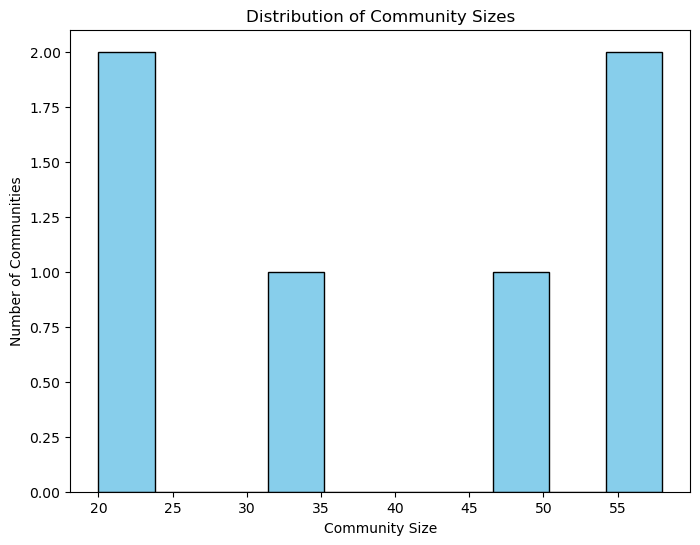

In [351]:
import matplotlib.pyplot as plt

# Plot community size distribution
plt.figure(figsize=(8, 6))
plt.hist(community_sizes, bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Community Size")
plt.ylabel("Number of Communities")
plt.title("Distribution of Community Sizes")
plt.show()


In [352]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(subset_G)

# Identify top nodes in each community
for idx, community in enumerate(communities):
    top_node = max(community, key=lambda node: degree_centrality[node])
    print(f"Community {idx + 1}: Top node {top_node} (Degree Centrality: {degree_centrality[top_node]:.3f})")


Community 1: Top node 1186 (Degree Centrality: 0.254)
Community 2: Top node 652193 (Degree Centrality: 0.203)
Community 3: Top node 11178592 (Degree Centrality: 0.212)
Community 4: Top node 9283582 (Degree Centrality: 0.127)
Community 5: Top node 12831 (Degree Centrality: 1.000)
Community 6: Top node 713263 (Degree Centrality: 0.144)


In [353]:
# Intra-community edges
def intra_community_edges(graph, community):
    return graph.subgraph(community).number_of_edges()

# Inter-community edges
def inter_community_edges(graph, community1, community2):
    return len([
        (u, v) for u in community1 for v in community2 if graph.has_edge(u, v)
    ])

# Compute edge metrics
for idx, community in enumerate(communities):
    intra_edges = intra_community_edges(subset_G, community)
    print(f"Community {idx + 1}: {len(community)} nodes, {intra_edges} intra-community edges")


Community 1: 49 nodes, 213 intra-community edges
Community 2: 58 nodes, 324 intra-community edges
Community 3: 55 nodes, 384 intra-community edges
Community 4: 20 nodes, 78 intra-community edges
Community 5: 35 nodes, 70 intra-community edges
Community 6: 20 nodes, 55 intra-community edges


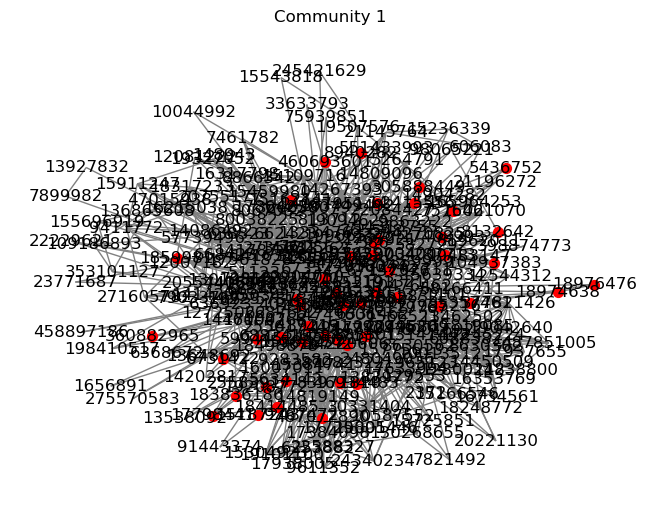

In [354]:
def visualize_single_community(graph, community, title):
    pos = nx.spring_layout(graph)
    nx.draw(
        graph, pos,
        nodelist=community,
        node_color="red",
        with_labels=True,
        node_size=50,
        edge_color="gray"
    )
    plt.title(title)
    plt.show()

# Visualize a specific community
visualize_single_community(subset_G, communities[0], "Community 1")


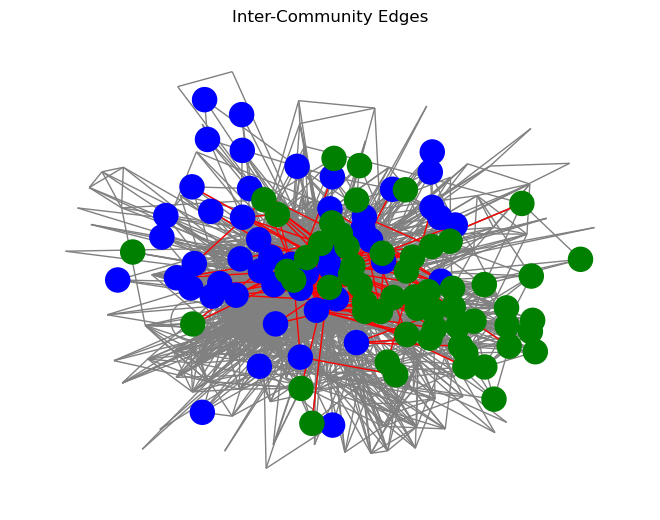

In [356]:
def visualize_inter_community_edges(graph, comm1, comm2):
    pos = nx.spring_layout(graph)
    nx.draw(
        graph, pos,
        nodelist=list(comm1) + list(comm2),
        node_color=["blue"] * len(comm1) + ["green"] * len(comm2),
        with_labels=False,
        edge_color="gray"
    )
    nx.draw_networkx_edges(
        graph, pos,
        edgelist=[(u, v) for u in comm1 for v in comm2 if graph.has_edge(u, v)],
        edge_color="red"
    )
    plt.title("Inter-Community Edges")
    plt.show()

# Visualize edges between Community 1 and Community 2
visualize_inter_community_edges(subset_G, communities[0], communities[1])


In [357]:
from networkx.algorithms.community.quality import modularity

# Compute modularity
modularity_score = modularity(subset_G, communities)
print(f"Modularity of the partition: {modularity_score:.3f}")

for idx, community in enumerate(communities):
    subgraph = subset_G.subgraph(community)
    density = nx.density(subgraph)
    print(f"Community {idx + 1}: Density = {density:.3f}")


Modularity of the partition: 0.330
Community 1: Density = 0.181
Community 2: Density = 0.196
Community 3: Density = 0.259
Community 4: Density = 0.411
Community 5: Density = 0.118
Community 6: Density = 0.289


Big clam implementation

In [362]:
import numpy as np
import networkx as nx

# Subset graph is already created as `subset_G`
nodes = np.array(list(subset_G.nodes()))
edges = list(subset_G.edges())

# Function to compute connections and non-connections
def get_connections(edges, nodes):
    NN = len(nodes)
    conns = {}
    for i, j in edges:
        conns.setdefault(i, []).append(j)
        conns.setdefault(j, []).append(i)
    all_nodes = set(nodes)
    nconns = {i: list(all_nodes - set(conns.get(i, [])) - {i}) for i in nodes}
    return conns, nconns

# Compute connections and non-connections
conns, nconns = get_connections(edges, nodes)
print("Connections:", conns)
print("Non-Connections:", nconns)
k = 2  # Number of communities
np.random.seed(42)
F = np.random.random((len(nodes), k)) * 0.1  # Random positive values
print("Initial F matrix:\n", np.around(F, 3))

Connections: {'398874773': ['652193', '1260231', '12831'], '652193': ['398874773', '2735631', '14367669', '1186', '6331462', '14305022', '380', '761', '1260231', '15384741', '14202711', '16912257', '68824195', '16461070', '19479427', '22253', '662423', '10476462', '15639334', '174958347', '287713', '180505807', '27985216', '14231571', '16934483', '14172562', '3191321', '8479062', '9943672', '79033767', '17633994', '40198602', '6160742', '13652832', '586', '67157376', '528', '883301', '10013512', '6735', '5854882', '14087951', '179339999', '20904050', '16119767', '51518017', '17459034', '12831'], '1260231': ['398874773', '652193', '14305022', '8479062', '22253', '12741', '15540222', '14172562', '14087951', '57378470', '19479427', '1186', '29294520', '14710479', '8630562', '663463', '13141442', '883301', '1371101', '9283582', '713263', '14178728', '15639334', '1566521', '14367669', '47', '16119767', '16004268', '10476462', '9767472', '179339999', '16912257', '130268655', '668423', '60883

In [363]:
import pandas as pd

# Load features
feat_file = "twitter/12831.feat"
features_df = pd.read_csv(feat_file, sep='\\s+', header=None)

# Separate node IDs and feature vectors
node_ids = features_df.iloc[:, 0]  # First column: node IDs
feature_vectors = features_df.iloc[:, 1:]  # Remaining columns: binary features

node_feature_dict = features_df.set_index(0).T.to_dict('list')

# Check the size of the ego features
ego_feat_file = "twitter/12831.egofeat"
ego_features = pd.read_csv(ego_feat_file, sep='\\s+', header=None).iloc[0].tolist()
print(f"Ego Features Size: {len(ego_features)}")

# Add ego features to the dictionary (optional)
node_feature_dict[12831] = ego_features



Ego Features Size: 1364


In [364]:
community_features = []


    
for idx, community in enumerate(communities):
    print(community)
    # Get feature vectors for all nodes in the community
    community_nodes = [int(node) for node in community if int(node) in node_feature_dict]
    community_feats = [node_feature_dict[node] for node in community_nodes]
    
    # Aggregate features (e.g., sum or average)
    if community_feats:
        aggregated_features = pd.DataFrame(community_feats).mean(axis=0).tolist()  # Average features
    else:
        aggregated_features = []
    
    community_features.append({
        "Community": idx,
        "Nodes": len(community_nodes),
        "Aggregated Features": aggregated_features
    })





{'360882965', '757502', '67157376', '586', '18976476', '1186', '104937383', '35357461', '8132642', '14892191', '5994452', '6731422', '15162141', '16934483', '19208772', '68824195', '1765921', '40198602', '57378470', '18414485', '1678471', '14', '27985216', '180505807', '1859981', '17459034', '183836186', '8940282', '18974638', '883301', '487072890', '14220606', '83971810', '15302100', '460693601', '12741', '5436752', '17798441', '380', '5634142', '15583257', '13652832', '16912257', '17408993', '2727051', '305888449', '287713', '15187243', '62415556'}
{'16461070', '17937655', '377821426', '12800212', '8630562', '21965123', '14313755', '18248772', '12544312', '19094625', '398874773', '179339999', '13141442', '17633994', '16007011', '19042640', '14450509', '248049056', '10476462', '9863222', '765548', '14367669', '1371101', '17561826', '6160742', '10013512', '14838800', '16353769', '15775613', '6331462', '8630302', '16119767', '8479062', '20221130', '19483147', '13839772', '2372', '156393

Total Features: 1364
Community 0:
  Number of Nodes: 49
Community 1:
  Number of Nodes: 58
Community 2:
  Number of Nodes: 55
Community 3:
  Number of Nodes: 20
Community 4:
  Number of Nodes: 35
Community 5:
  Number of Nodes: 20


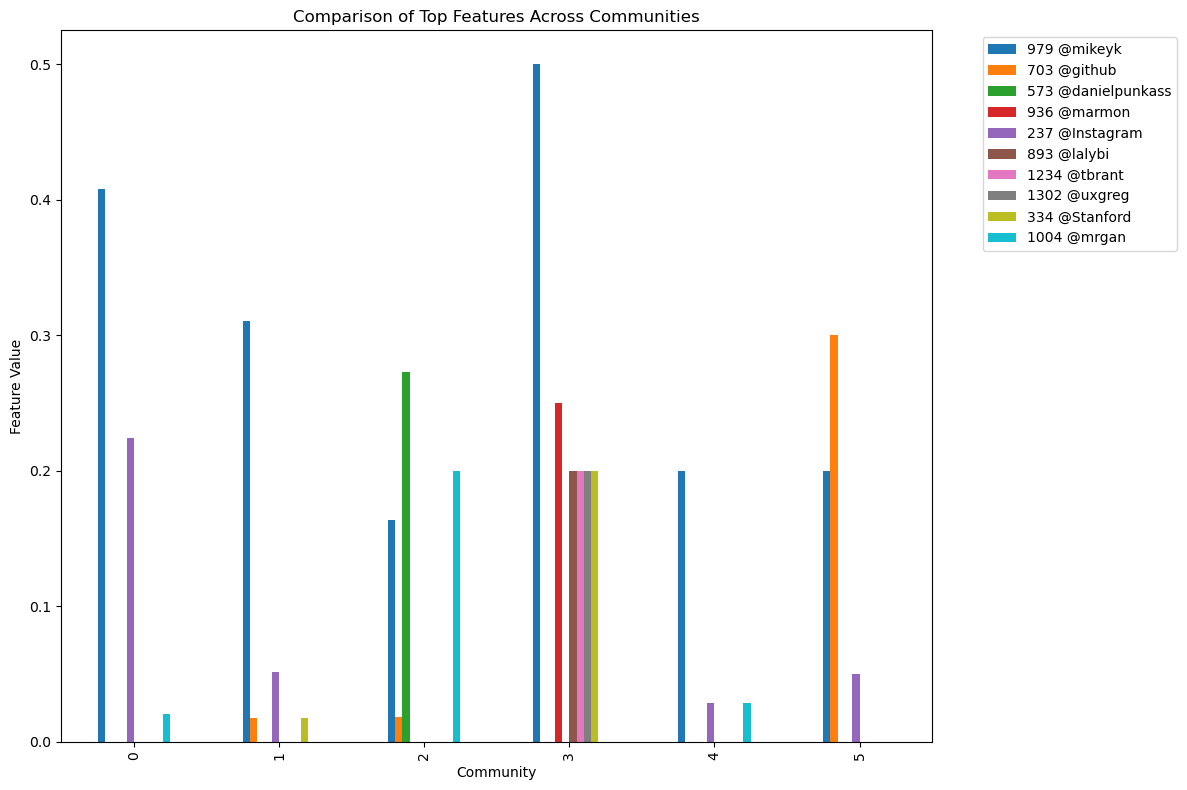

In [366]:
import pandas as pd
import matplotlib.pyplot as plt

featnames_file = "twitter/12831.featnames"

# Open the file with UTF-8 encoding
with open(featnames_file, "r", encoding="utf-8") as f:
    feature_names = [line.strip() for line in f]

# Ensure the number of feature names matches the feature vector length
print(f"Total Features: {len(feature_names)}")

# Assuming `community_features` is already computed
community_features = []


for idx, community in enumerate(communities):
    # Get feature vectors for all nodes in the community
    community_nodes = [int(node) for node in community]
    community_feats = [node_feature_dict[node] for node in community_nodes]
    
    # Aggregate features (e.g., sum or average)
    if community_feats:
        aggregated_features = pd.DataFrame(community_feats).mean(axis=0).tolist()  # Average features
    else:
        aggregated_features = []
    
    # Map aggregated features to feature names
    feature_summary = dict(zip(feature_names, aggregated_features)) if aggregated_features else {}

    community_features.append({
        "Community": idx,
        "Nodes": len(community_nodes),
        "Feature Summary": feature_summary
    })

# Print summary of community features with feature names
for cf in community_features:
    print(f"Community {cf['Community']}:")
    print(f"  Number of Nodes: {cf['Nodes']}")


def plot_feature_comparison(community_features, top_k=10):
    # Extract features for visualization as a DataFrame
    feature_df = pd.DataFrame([
        cf["Feature Summary"] for cf in community_features
    ])
    
    # Find top-k most variable features across communities
    variances = feature_df.var(axis=0)
    top_features = variances.nlargest(top_k).index  # These are feature names (strings)
    
    # Plot
    feature_df[top_features].plot(kind='bar', figsize=(12, 8))
    plt.title("Comparison of Top Features Across Communities")
    plt.xlabel("Community")
    plt.ylabel("Feature Value")
    
    # Use top_features directly for the legend
    plt.legend(top_features, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Call plotting function
plot_feature_comparison(community_features, top_k=10)